**Rohit Kumar 8895806**

##1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


*Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.*

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('***********************')
print('Shapes:')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:') 
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('***********************')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
***********************
Shapes:
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
***********************
Image Data Range:
Min: 0
Max: 255


- The image data are in the shape of (28, 28), which means each image is a 28x28 pixel square.
- The training images contains 60,000 images and its labeles.
- Similarly, the test images contains 10,000 images and its corresponding labels.

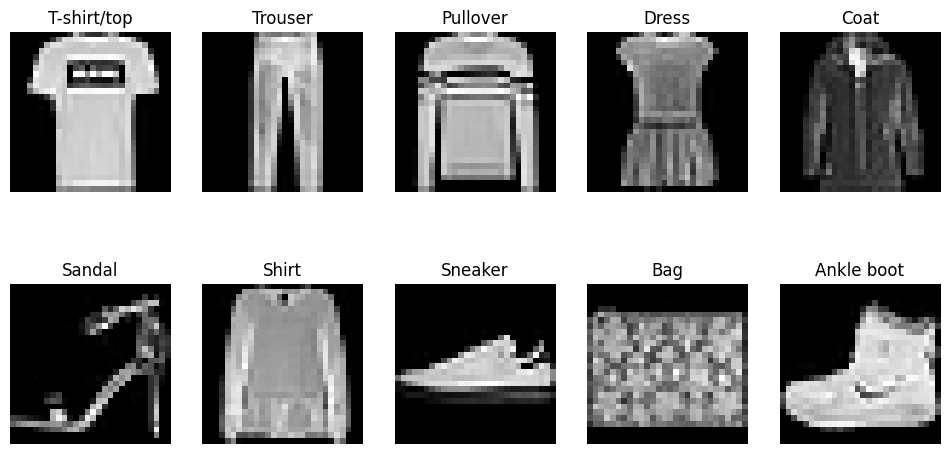

In [8]:
image_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}
# plotting a single unique image for each label
plt.figure(figsize=(12, 6))
unique_images = np.unique(train_labels)
for i, image_index in enumerate(unique_images):
    plt.subplot(2, 5, i + 1)
    index = np.where(train_labels == image_index)[0][0]
    plt.imshow(train_images[index], cmap='gray')
    plt.title(image_labels[image_index])
    plt.axis('off')
plt.show()

As presented there are 10 uniques sets of images in our dataset that needs to be classified.

Data Preprocessing:

In [9]:
# flattening the 28x28 image into  1 dimension
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

print('Shapes after flattening:')
print('Train Data:')
print(f'Images: {train_images.shape}')
print('Test Data:') 
print(f'Images: {test_images.shape}')


Shapes after flattening:
Train Data:
Images: (60000, 784)
Test Data:
Images: (10000, 784)


In [10]:
# Normalizing the image pixels values to 0 and 1
train_images = train_images.astype("float32") / 255 
test_images = test_images.astype("float32") / 255

In [11]:
# printing out the minimum and maximum values of the `train_images` , as well as its shape and the shape of the first element in the array.
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


2. Train a dense neural network using Keras (2 points)

Defining the model, Loss Function, Optimizer and Metrics:

In [12]:
# creating a neural network model using the Keras library.
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4945 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3710 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3397 - accuracy: 0.8802
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3214 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3093 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3002 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2896 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2818 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2778 - accuracy: 0.9046
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [13]:
# making predictions on test_images
prediction = model.predict(test_images)
prediction  

313/313 [==============================] - 1s 4ms/step


array([[2.5834099e-09, 2.4016978e-11, 2.5913030e-11, ..., 1.2435910e-04,
        2.6751643e-09, 9.9971479e-01],
       [1.7091905e-08, 7.3599495e-12, 9.9999595e-01, ..., 1.5264481e-10,
        3.5594327e-12, 1.1589491e-12],
       [8.0811273e-14, 1.0000000e+00, 2.8139755e-17, ..., 7.1273943e-18,
        7.5884867e-19, 5.5451571e-15],
       ...,
       [4.0099271e-06, 1.0279286e-14, 4.5098361e-08, ..., 7.1491382e-09,
        9.9999547e-01, 1.2798247e-10],
       [5.9443925e-14, 1.0000000e+00, 3.9112699e-13, ..., 1.0769490e-13,
        1.7729018e-13, 2.3403175e-11],
       [4.8720285e-05, 1.6062782e-05, 1.4302389e-05, ..., 4.5422437e-03,
        1.2348170e-04, 4.8209884e-05]], dtype=float32)

In [14]:
# using the `np.argmax()` function to find the index of the maximum value along the specified axis (axis=1). 
predicted_labels = np.argmax(prediction, axis=1)
print(predicted_labels)

[9 2 1 ... 8 1 5]


3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

Accuracy:

In [15]:

# evaluating the performance of the model on a test dataset.
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

Test Accuracy: 88.80%
313/313 [==============================] - 1s 3ms/step


The accurace of the model was found to be 88.06%, which means the model correctly predicted approximately 88.06% of the test image.

Confusion Matrix:

In [16]:
# calculating the confusion matrix using the TensorFlow library. 
confusion_matrix = tf.math.confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix.numpy())

Confusion Matrix:
[[867   0  14  27   6   4  78   0   4   0]
 [  4 972   2  17   2   0   3   0   0   0]
 [ 19   0 844  19  67   0  51   0   0   0]
 [ 19   3   7 923  26   0  20   0   2   0]
 [  0   0 110  35 805   0  50   0   0   0]
 [  0   0   0   1   0 983   0  13   0   3]
 [145   0 101  40  81   0 627   0   6   0]
 [  0   0   0   0   0  22   0 964   0  14]
 [  9   0   5   6   5   7   2   3 963   0]
 [  0   0   0   0   0  13   1  54   0 932]]


The diagnoal elements represent the number of correct prediction for each image class, while the off-diagnoal elements representes misclassifications.

Observing our confusion matrix:
- The label `T-shirt/top` has been misclassified as `Shirt` 56 times.
- The label `Pullover` is misclassified as `Coat` 117 times and as `Shirt` 56 times.
- The label `Coat` is misclassified as `Pullover` 85 times and as `Shirt` 29 times.
- The label `Shirt` is mostly misclassified as `T-shirt/top` with 197 instances, as `Pullover` for 84 instance and as a `Coat` with 109 instance of misclassification.

*These are only some of the relavant incorrect classificiaion ovserved but there are still more as observed above in the confusion matrix.*

Hence, it seems that our model has difficulties in categorizing some of these images correctly as seen from the confusion matrix.

Incorrect Classification:

In [17]:
# finding the number of incorrect predicitions
misclassified_indices = np.where(predicted_labels != test_labels)[0]
print('Total number of incorrect indices',len(misclassified_indices))

Total number of incorrect indices 1120



Incorrect Classifications:


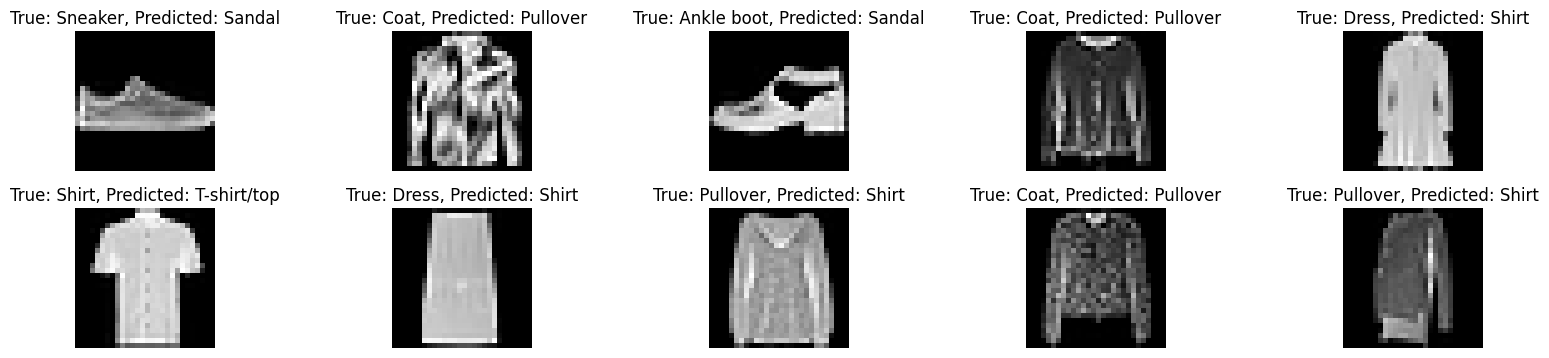

In [18]:
# displaying a set of misclassified images along with their true labels and predicted labels.
print("\nIncorrect Classifications:")
plt.figure(figsize=(16, 9))
num_examples = 10
for i, idx in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(5,5, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {image_labels[test_labels[idx]]}, Predicted: {image_labels[predicted_labels[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

We achieved an accuracy of around 88.06% which is not bad but as seen we still have some misclassification in our model, which sugests that there is still room for improvements. To further enhance this model we can fine-tune the model or explore different optimization alogrithms and learning rates.